# Baseline Linear model

In [ ]:

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

from sklearn.preprocessing import StandardScaler
from scipy import special
from scipy import stats


### Import split data

In [ ]:

X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv").squeeze()

X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv").squeeze()

In [ ]:
# check point
y_test.max()

6575000

In [ ]:
X_train.columns

Index(['bfe', 'gov_property_value', 'gov_land_value', 'unit_sqm_resi', 'rooms',
       'street_number', 'longitude', 'latitude', 'building_year', 'gov_sqm',
       ...
       'street_name_Æblestien', 'street_name_ØrestadsBoulevard',
       'street_name_ØresundParkvej', 'street_name_Øresundsvej',
       'street_name_Østerdalsgade', 'street_name_Østrigsgade', 'year_2019',
       'year_2020', 'year_2021', 'year_2022'],
      dtype='object', length=198)

## Linear Model

### Default 

In [ ]:
#model creation 
lr_model = LinearRegression()

#fit model
lr_model.fit(X_train, y_train)

# evaluate the model
y_pred = lr_model.predict(X_test)

# evaluate predictions
r2 = round(metrics.r2_score(y_test, y_pred),4)
mae = round(mean_absolute_error(y_test, y_pred))
mape = round(mean_absolute_percentage_error(y_test, y_pred),4)

print('R2:', r2)
print('MAE:', mae)
print('MAPE:', mape)

R2: 0.9056
MAE: 269995
MAPE: 0.0917


## Transformation

In [ ]:
# scale training data and test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train_transformed = np.sqrt(y_train)
    
# create linear regression model and train
reg = LinearRegression().fit(X_train, y_train_transformed)
    
# create predictions on test set
preds = reg.predict(X_test)
    
# transform back
y_preds = preds**2
    
# get r2
r2 = round(r2_score(y_test, y_preds), 4)

# get mape
mape = round(mean_absolute_percentage_error(y_test, y_preds),4)
    
#get mae
mae = round(mean_absolute_error(y_test, y_preds))

print('R2:', r2)
print('MAE:', mae)
print('MAPE:', mape)

R2: 0.912
MAE: 253892
MAPE: 0.082


In [ ]:
y_test

0      2300000
1      2450000
2      5150000
3      4900000
4      4200000
        ...   
173    5295000
174    6575000
175    2000000
176    2925000
177    3150000
Name: sold_price, Length: 178, dtype: int64

178


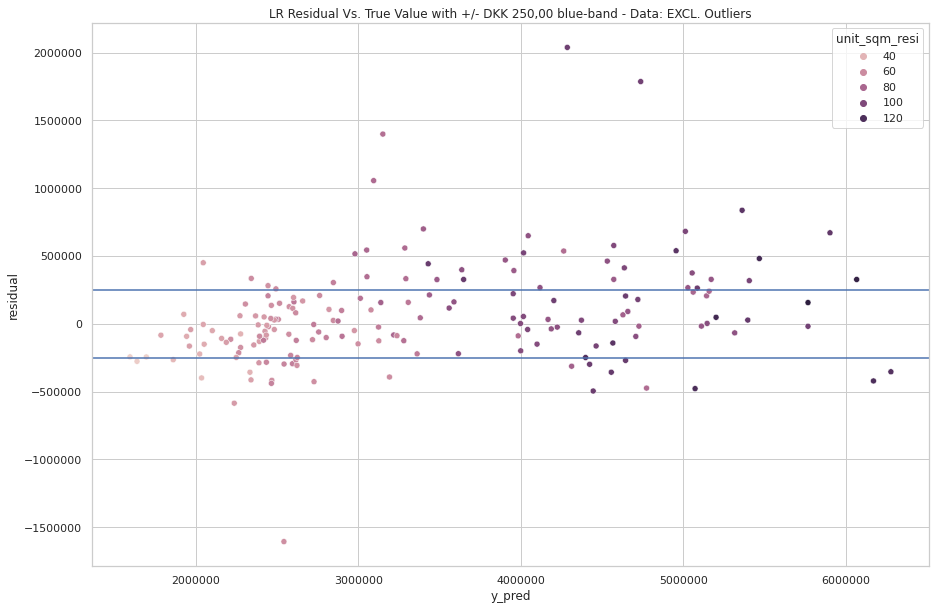

<Figure size 7200x7200 with 0 Axes>

In [ ]:
# make results dataframe
df_results = pd.read_csv("X_test.csv")

df_results['y_true'] = y_test
df_results['y_pred'] = np.round(y_preds)
df_results['residual'] = df_results['y_true'] - df_results['y_pred'] 
df_results['residual_abs'] = abs(df_results['y_true'] - df_results['y_pred'])


# make chart for pred. and residuals 
sns.set(style='whitegrid', rc={"figure.figsize":(15, 10)})
 
sns.scatterplot(x= df_results.y_pred,
                    y=df_results.residual,
                    data=df_results,
                    hue=df_results.unit_sqm_resi,                   
                    )
plt.title('LR Residual Vs. True Value with +/- DKK 250,00 blue-band - Data: EXCL. Outliers')

# ax lines 
plt.axhline(250000)
plt.axhline(-250000)

plt.ticklabel_format(style='plain')
plt.figure(figsize=(100,100))

print(len(y_preds))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a2d9d23-5445-401b-81ac-9e4d2df66dba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>